In [81]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
conn = psql.connect(dbname='datawarehouse',
                       host='localhost', user='gabriel', password='gyfu')

In [82]:
cur = conn.cursor()
cur.execute('select d.day, d.month, d.year, count(f.*) from date d left join fires f on d.id = f.dateid and f.locationid = 19 group by d.day, d.month, d.year order by d.year, d.month, d.day asc;')
fireCount = cur.fetchall()
cur.close()
cur = conn.cursor()
cur.execute('select d.day, d.month, d.year, w.mimtemp, w.maxtemp, w.rainfall, w.windgustdir, w.windgustspeed from date d left join weather w on d.id = w.dateid and w.locationid = 19 order by d.year, d.month, d.day asc;')
weatherData = cur.fetchall()
cur.close()
conn.close()

In [83]:
date = []
count = []
for day in fireCount:
    date.append((day[0], day[1], day[2]))
    count.append(day[3])

fireCountDB = pd.DataFrame(data={'date': date, 'count': count})

date = []
mimtemp = []
maxtemp = []
rainfall = []
windgustdir = []
windgustspeed = []
for day in weatherData:
    date.append((day[0], day[1], day[2]))
    mimtemp.append(day[3])
    maxtemp.append(day[4])
    rainfall.append(day[5])
    windgustdir.append(day[6])
    windgustspeed.append(day[7])

weatherDataDB = pd.DataFrame(data={'date': date, 'mimtemp': mimtemp, 'maxtemp': maxtemp, 'rainfall': rainfall, 'windgustdir': windgustdir, 'windgustspeed': windgustspeed})

In [84]:
fireCountDB = fireCountDB.set_index('date')
fireCountDB

,count
date,
"(1, 1, 2008)",0
"(2, 1, 2008)",0
"(3, 1, 2008)",0
"(4, 1, 2008)",0
"(5, 1, 2008)",0
...,...
"(21, 6, 2017)",12
"(22, 6, 2017)",20
"(23, 6, 2017)",20


In [85]:
weatherDataDB = weatherDataDB.set_index('date')
weatherDataDB

,mimtemp,maxtemp,rainfall,windgustdir,windgustspeed
date,,,,,
"(1, 1, 2008)",None,None,None,None,NaN
"(2, 1, 2008)",None,None,None,None,NaN
"(3, 1, 2008)",None,None,None,None,NaN
"(4, 1, 2008)",None,None,None,None,NaN
"(5, 1, 2008)",None,None,None,None,NaN
...,...,...,...,...,...
"(21, 6, 2017)",4.6,20.4,0.0,SSW,28.0
"(22, 6, 2017)",6.5,21.5,0.0,E,31.0
"(23, 6, 2017)",6.2,22.5,0.0,E,31.0


In [86]:
fireWeatherDataDB = weatherDataDB.merge(fireCountDB, left_index=True, right_index=True)
fireWeatherDataDB

,mimtemp,maxtemp,rainfall,windgustdir,windgustspeed,count
date,,,,,,
"(1, 1, 2008)",None,None,None,None,NaN,0
"(2, 1, 2008)",None,None,None,None,NaN,0
"(3, 1, 2008)",None,None,None,None,NaN,0
"(4, 1, 2008)",None,None,None,None,NaN,0
"(5, 1, 2008)",None,None,None,None,NaN,0
...,...,...,...,...,...,...
"(21, 6, 2017)",4.6,20.4,0.0,SSW,28.0,12
"(22, 6, 2017)",6.5,21.5,0.0,E,31.0,20
"(23, 6, 2017)",6.2,22.5,0.0,E,31.0,20


In [87]:
fireWeatherDataDB = fireWeatherDataDB[fireWeatherDataDB.mimtemp.notnull()]
fireWeatherDataDB = fireWeatherDataDB[fireWeatherDataDB.maxtemp.notnull()]
fireWeatherDataDB = fireWeatherDataDB[fireWeatherDataDB.rainfall.notnull()]
fireWeatherDataDB = fireWeatherDataDB[fireWeatherDataDB.windgustdir.notnull()]
fireWeatherDataDB = fireWeatherDataDB[fireWeatherDataDB.windgustspeed.notnull()]
fireWeatherDataDB

,mimtemp,maxtemp,rainfall,windgustdir,windgustspeed,count
date,,,,,,
"(1, 1, 2009)",16.4,38.7,0.0,NW,54.0,0
"(2, 1, 2009)",22.3,30.3,0.0,NNE,30.0,0
"(3, 1, 2009)",21.2,33.3,0.0,ENE,46.0,1
"(4, 1, 2009)",16.4,33.5,0.0,ENE,39.0,0
"(5, 1, 2009)",19.2,34.5,0.0,SE,35.0,2
...,...,...,...,...,...,...
"(21, 6, 2017)",4.6,20.4,0.0,SSW,28.0,12
"(22, 6, 2017)",6.5,21.5,0.0,E,31.0,20
"(23, 6, 2017)",6.2,22.5,0.0,E,31.0,20


In [88]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
fireWeatherDataDB['windgustdir'] = enc.fit_transform(fireWeatherDataDB['windgustdir'])
fireWeatherDataDB

,mimtemp,maxtemp,rainfall,windgustdir,windgustspeed,count
date,,,,,,
"(1, 1, 2009)",16.4,38.7,0.0,7,54.0,0
"(2, 1, 2009)",22.3,30.3,0.0,5,30.0,0
"(3, 1, 2009)",21.2,33.3,0.0,1,46.0,1
"(4, 1, 2009)",16.4,33.5,0.0,1,39.0,0
"(5, 1, 2009)",19.2,34.5,0.0,9,35.0,2
...,...,...,...,...,...,...
"(21, 6, 2017)",4.6,20.4,0.0,11,28.0,12
"(22, 6, 2017)",6.5,21.5,0.0,0,31.0,20
"(23, 6, 2017)",6.2,22.5,0.0,0,31.0,20


In [89]:
from sklearn.preprocessing import StandardScaler
for colum in fireWeatherDataDB.columns.values:
    scaler = StandardScaler()
    scaler_data = fireWeatherDataDB[colum].values.copy()
    scaler_data.shape = (len(scaler_data), 1)
    fireWeatherDataDB[colum] = scaler.fit_transform(scaler_data)
fireWeatherDataDB

,mimtemp,maxtemp,rainfall,windgustdir,windgustspeed,count
date,,,,,,
"(1, 1, 2009)",0.529265,1.706585,-0.245273,-0.006126,1.277006,-0.551517
"(2, 1, 2009)",1.394443,0.487692,-0.245273,-0.402469,-0.872142,-0.551517
"(3, 1, 2009)",1.233138,0.923011,-0.245273,-1.195155,0.560624,-0.481219
"(4, 1, 2009)",0.529265,0.952032,-0.245273,-1.195155,-0.066211,-0.551517
"(5, 1, 2009)",0.939858,1.097138,-0.245273,0.390217,-0.424403,-0.410921
...,...,...,...,...,...,...
"(21, 6, 2017)",-1.201090,-0.948861,-0.245273,0.786560,-1.051238,0.292057
"(22, 6, 2017)",-0.922474,-0.789244,-0.245273,-1.393327,-0.782594,0.854439
"(23, 6, 2017)",-0.966466,-0.644137,-0.245273,-1.393327,-0.782594,0.854439


In [90]:
target = fireWeatherDataDB.values[:, -1]
x = fireWeatherDataDB.values[:, :-1]
print(x)
print(target)

[[ 0.52926493  1.70658474 -0.24527252 -0.00612608  1.27700621]
 [ 1.39444258  0.48769176 -0.24527252 -0.40246918 -0.87214184]
 [ 1.23313827  0.92301068 -0.24527252 -1.19515538  0.56062353]
 ...
 [-0.96646592 -0.64413743 -0.24527252 -1.39332693 -0.782594  ]
 [-1.17176231 -0.818265   -0.24527252  0.78656012 -1.05123751]
 [-0.89314578 -0.68766932 -0.24527252  1.18290322 -1.85716803]]
[-0.55151654 -0.55151654 -0.48121877 ...  0.85443875  0.78414099
 -0.05943219]


In [91]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

mlp = MLPRegressor(hidden_layer_sizes=(100,200,400,800,1600,), activation='identity', max_iter=1000, solver='sgd')
fullPredict = cross_val_predict(mlp, x, target, cv=10)
print('Mean Squared Error: %s' %(metrics.mean_squared_error(target, fullPredict)))
print('Mean Absolute Error: %s' %(metrics.mean_absolute_error(target, fullPredict)))

Mean Squared Error: 0.9489715485625069
Mean Absolute Error: 0.48168766851171463


In [92]:
fireWeatherDataDB['predict'] = fullPredict
fireWeatherDataDB

,mimtemp,maxtemp,rainfall,windgustdir,windgustspeed,count,predict
date,,,,,,,
"(1, 1, 2009)",0.529265,1.706585,-0.245273,-0.006126,1.277006,-0.551517,0.565736
"(2, 1, 2009)",1.394443,0.487692,-0.245273,-0.402469,-0.872142,-0.551517,-0.392299
"(3, 1, 2009)",1.233138,0.923011,-0.245273,-1.195155,0.560624,-0.481219,-0.147514
"(4, 1, 2009)",0.529265,0.952032,-0.245273,-1.195155,-0.066211,-0.551517,0.109813
"(5, 1, 2009)",0.939858,1.097138,-0.245273,0.390217,-0.424403,-0.410921,0.113544
...,...,...,...,...,...,...,...
"(21, 6, 2017)",-1.201090,-0.948861,-0.245273,0.786560,-1.051238,0.292057,-0.003496
"(22, 6, 2017)",-0.922474,-0.789244,-0.245273,-1.393327,-0.782594,0.854439,-0.138672
"(23, 6, 2017)",-0.966466,-0.644137,-0.245273,-1.393327,-0.782594,0.854439,-0.054820


<AxesSubplot:xlabel='date'>

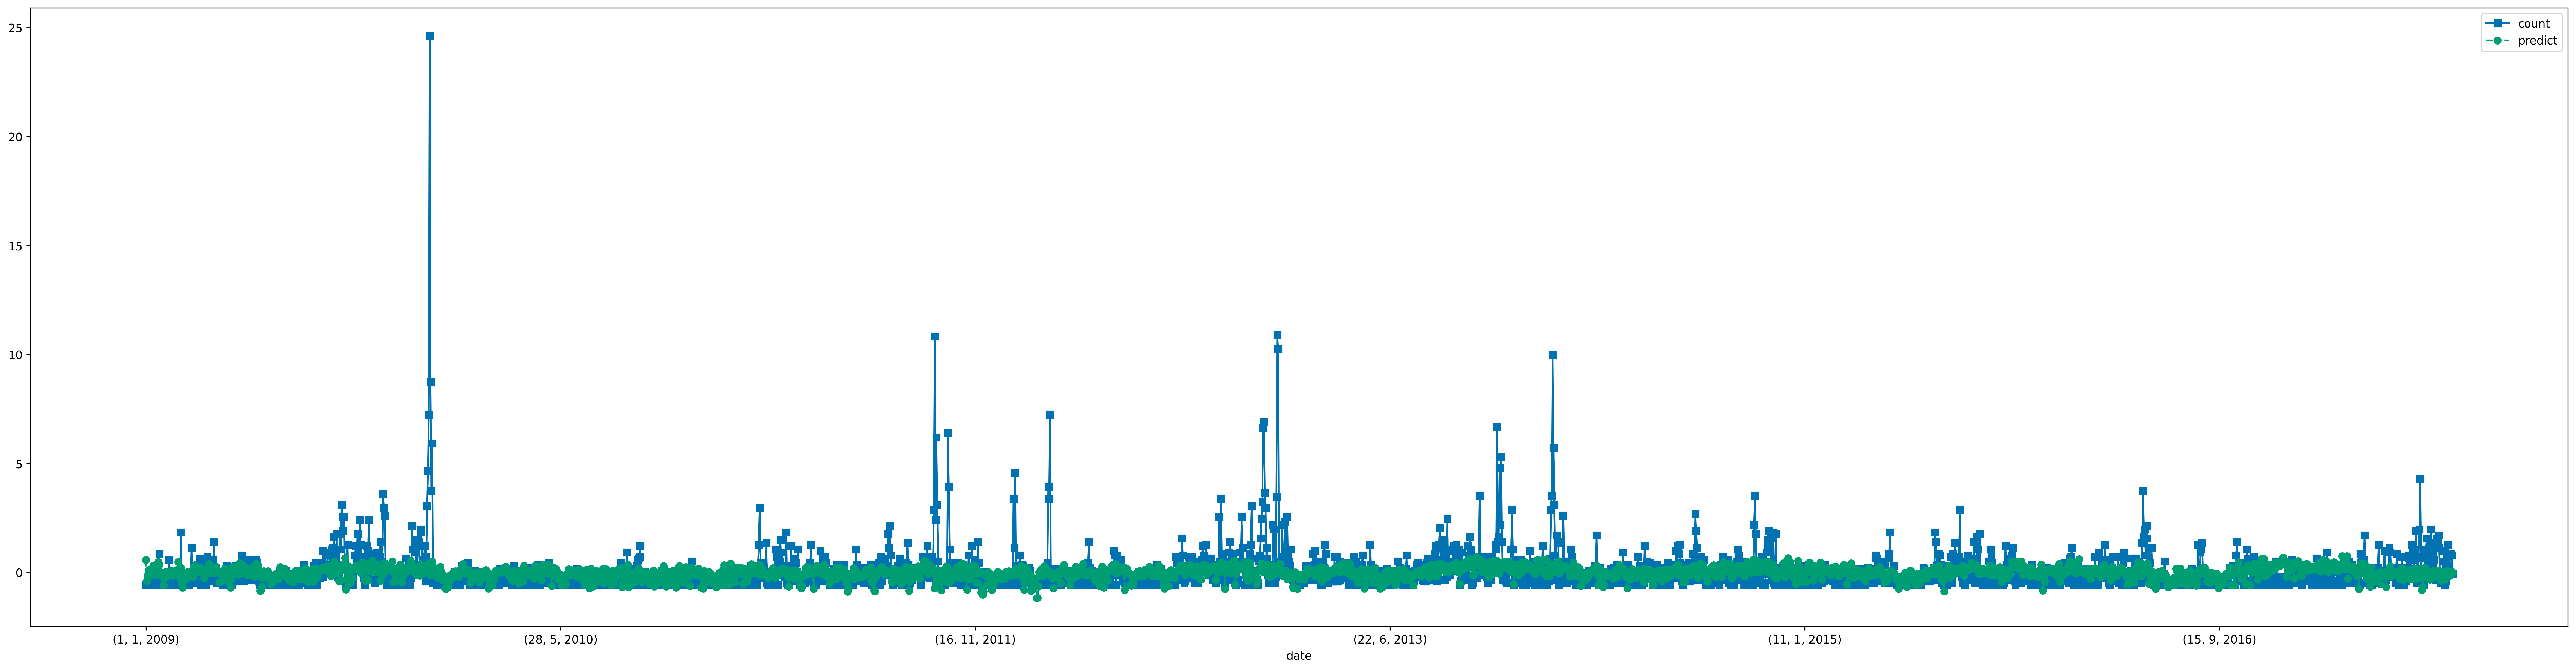

In [93]:
import matplotlib.pyplot as plt
fireWeatherDataDB.plot(y=['count', 'predict'], style=['s-', 'o--'], figsize=(40,10))